<br>
<center> 
    <font  color='Navy' size='10'>  MNIST
<br>



<br>

<img src='../assets/MNIST.png' width=500px>

<br>

<br>

---
<br>

In this notebook, we will Comparison between Multi-Layer Perceptron (MLP) to classify images and Convolutional Neural Networks (CNN) to see the effect of each approch on the classification and accuracy of the data.

The images from the [MNIST database](http://yann.lecun.com/exdb/mnist/) hand-written digit database.


The process will be broken down into the following steps for each approch :
>1. Load and visualize the data
2. Define a neural network
3. Train the model
4. Evaluate the performance of our trained model on a test dataset!


In [1]:
# import libraries
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
    

# Load and visualize the data

## Load the data
To download the MNIST data, you are free to use one of these codes.
```
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)
```

[The Reference](https://github.com/pytorch/vision/issues/1938)

or simply use this code:
```
from torchvision.datasets import MNIST
```

In [2]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2
# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = MNIST(root='data', train=False,
                                  download=True, transform=transform)

# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)


# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

## Visualize a Batch of Training Data

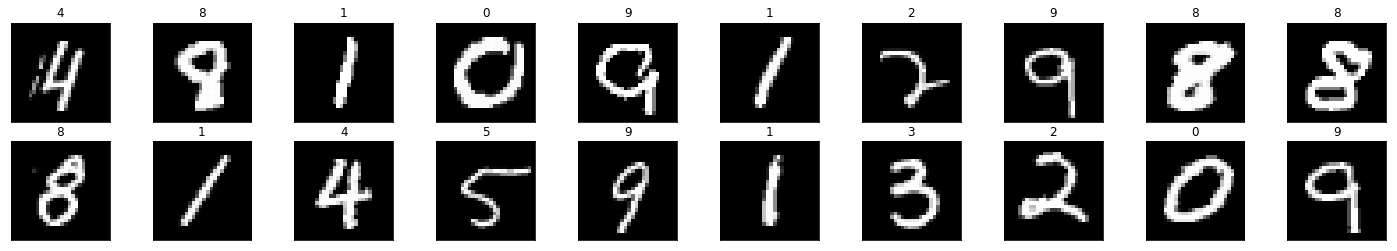

In [3]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

## View an Image in More Detail

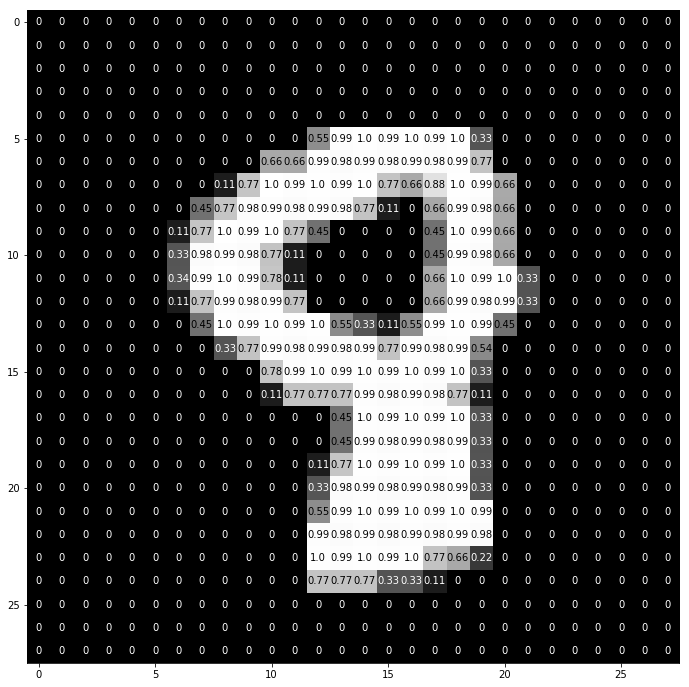

In [4]:
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

As we can see that each image is nothing but several pixels together and for these images, each image is 28 * 28 pixels, so we can treat each image as an array and the size depends on both the height and width of the image.
But as we can see in the following picture, MLP receives the data as a vector as in the input layer, so what we will do is reformulate the array into a vector by flatten image through:
```
x.view(-1, 28 * 28)
```
<img src='../assets/MLP.png' width=500px>
<br>

<br>

---
<br>

<br>

 <center> 
    <font  color='Navy' size='10'>  Multi-Layer Perceptron
         </font>
      </p>
      
<br>


# Define a neural network

In [5]:
class MLP_Net(nn.Module):
    def __init__(self):
        super(MLP_Net, self).__init__()
        # linear layer (784 -> 1 hidden node)
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x


In [6]:
# initialize the NN
MLP_model = MLP_Net()
print(MLP_model)

MLP_Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)


In [7]:
# specify loss function
criterion =  nn.CrossEntropyLoss()
# specify optimizer
optimizer = torch.optim.SGD(MLP_model.parameters(), lr=0.01)

# Train the model

In [8]:
# import 2 Function ( train and test ) to evaluate the model.
from evaluation import train, test

In [9]:
train(model = MLP_model, n_epochs = 30, criterion = criterion,
      optimizer = optimizer, train_loader = train_loader, valid_loader = valid_loader)

Epoch: 1 	Training Loss: 0.753301
Epoch: 1 	Training Loss: 0.000013 	Validation Loss: 0.076325
Validation loss decreased (inf --> 0.076325).  Saving model ...
Epoch: 2 	Training Loss: 0.284578
Epoch: 2 	Training Loss: 0.000005 	Validation Loss: 0.057182
Validation loss decreased (0.076325 --> 0.057182).  Saving model ...
Epoch: 3 	Training Loss: 0.225223
Epoch: 3 	Training Loss: 0.000004 	Validation Loss: 0.048033
Validation loss decreased (0.057182 --> 0.048033).  Saving model ...
Epoch: 4 	Training Loss: 0.185224
Epoch: 4 	Training Loss: 0.000003 	Validation Loss: 0.040511
Validation loss decreased (0.048033 --> 0.040511).  Saving model ...
Epoch: 5 	Training Loss: 0.157670
Epoch: 5 	Training Loss: 0.000003 	Validation Loss: 0.034719
Validation loss decreased (0.040511 --> 0.034719).  Saving model ...
Epoch: 6 	Training Loss: 0.138073
Epoch: 6 	Training Loss: 0.000002 	Validation Loss: 0.030874
Validation loss decreased (0.034719 --> 0.030874).  Saving model ...
Epoch: 7 	Training Lo

# Evaluate the performance of our trained model on a test dataset

In [10]:
test(model = MLP_model, criterion = criterion, test_loader = test_loader, batch_size = batch_size)

Test Loss: 0.060268

Test Accuracy of     0: 98% (970/980)
Test Accuracy of     1: 99% (1125/1135)
Test Accuracy of     2: 97% (1008/1032)
Test Accuracy of     3: 98% (990/1010)
Test Accuracy of     4: 98% (968/982)
Test Accuracy of     5: 98% (876/892)
Test Accuracy of     6: 98% (941/958)
Test Accuracy of     7: 97% (1003/1028)
Test Accuracy of     8: 97% (949/974)
Test Accuracy of     9: 97% (984/1009)

Test Accuracy (Overall): 98% (9814/10000)


<br>

---
<br>

<br>

   <center> 
    <font  color='Navy' size='10'>  Convolutional Neural Networks
         </font>


      
<br>


It is recommended to use LCU for faster training
You can use the following code:
check if CUDA is available
```
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')
    
```
After define the CNN architecture use:
move tensors to GPU if CUDA is available
```
if train_on_gpu:
    CNN_model.cuda()
```

# Define a neural network

In [12]:
# define the CNN architecture
class CNN_Net(nn.Module):
    def __init__(self):
        super(CNN_Net, self).__init__()
        # convolutional layer
        self.conv1 = nn.Conv2d(1, 12, 3, padding=1)
        self.conv2 = nn.Conv2d(12, 24, 3, padding=1)

        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        # linear layer 
        self.fc1 = nn.Linear(24*7*7, 512)
        # linear layer 
        self.fc2 = nn.Linear(512, 10)
        # dropout layer 
        self.dropout = nn.Dropout(0.25)
        

    def forward(self, x):
        
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

        x = x.view(-1, 24*7*7)  # flatten image input
    
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x



In [13]:
# create a complete CNN
CNN_model = CNN_Net()
print(CNN_model)

CNN_Net(
  (conv1): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1176, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.25)
)


In [14]:
# specify loss function
criterion =  nn.CrossEntropyLoss()
# specify optimizer
optimizer = torch.optim.SGD(CNN_model.parameters(), lr=0.01)

# Train the model

In [16]:
train(model = CNN_model, n_epochs = 30, criterion = criterion,
      optimizer = optimizer, train_loader = train_loader, valid_loader = valid_loader)

Epoch: 1 	Training Loss: 0.594841
Epoch: 1 	Training Loss: 0.000010 	Validation Loss: 0.040075
Validation loss decreased (inf --> 0.040075).  Saving model ...
Epoch: 2 	Training Loss: 0.153560
Epoch: 2 	Training Loss: 0.000003 	Validation Loss: 0.021420
Validation loss decreased (0.040075 --> 0.021420).  Saving model ...
Epoch: 3 	Training Loss: 0.107375
Epoch: 3 	Training Loss: 0.000002 	Validation Loss: 0.015976
Validation loss decreased (0.021420 --> 0.015976).  Saving model ...
Epoch: 4 	Training Loss: 0.086564
Epoch: 4 	Training Loss: 0.000001 	Validation Loss: 0.013198
Validation loss decreased (0.015976 --> 0.013198).  Saving model ...
Epoch: 5 	Training Loss: 0.072349
Epoch: 5 	Training Loss: 0.000001 	Validation Loss: 0.012052
Validation loss decreased (0.013198 --> 0.012052).  Saving model ...
Epoch: 6 	Training Loss: 0.064693
Epoch: 6 	Training Loss: 0.000001 	Validation Loss: 0.011804
Validation loss decreased (0.012052 --> 0.011804).  Saving model ...
Epoch: 7 	Training Lo

# Evaluate the performance of our trained model on a test dataset

In [17]:
test(model = CNN_model, criterion = criterion, test_loader = test_loader, batch_size = batch_size)

Test Loss: 0.026248

Test Accuracy of     0: 99% (976/980)
Test Accuracy of     1: 99% (1132/1135)
Test Accuracy of     2: 99% (1025/1032)
Test Accuracy of     3: 99% (1005/1010)
Test Accuracy of     4: 99% (974/982)
Test Accuracy of     5: 98% (883/892)
Test Accuracy of     6: 98% (941/958)
Test Accuracy of     7: 99% (1021/1028)
Test Accuracy of     8: 99% (965/974)
Test Accuracy of     9: 98% (991/1009)

Test Accuracy (Overall): 99% (9913/10000)


<br>

---
<br>

<br>


   <center> 
    <font  color='Navy' size='10'>  Conclusion
         </font>
<br>


The difference may not be very clear between the two methods in this data, due to several reasons, including that the data all have the same size and the location of the numbers is always in the middle, and the absence of complexity and colors shows its impact clearly in the case of using other data, NLP will suffer greatly in discovering these patterns.

If you want to read more to know the difference between both methods, [you can click here](https://medium.com/analytics-vidhya/cnn-convolutional-neural-network-8d0a292b4498)